In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load the model and tokenizer
model_name = "nateraw/bert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a pipeline for emotion classification
emotion_classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)



/home/prasoon/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-27 10:46:31.807554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730006191.821521   52518 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730006191.825258   52518 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 10:46:31.840909: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operati

In [2]:
# Example texts
texts = [
    "i am happy",
    "My ass hurts",
    "I feel really sad and lonely."
]

# Predict emotions
for text in texts:
    result = emotion_classifier(text)
    print(f"Text: {text}")
    print(f"Emotion: {result[0]['label']}, Score: {result[0]['score']:.4f}")
    print("-" * 30)

Text: i am happy
Emotion: joy, Score: 0.9954
------------------------------
Text: My ass hurts
Emotion: sadness, Score: 0.9335
------------------------------
Text: I feel really sad and lonely.
Emotion: sadness, Score: 0.9956
------------------------------


# WITH TRAINING DATA

In [3]:
from transformers import pipeline

# Sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Example inputs
inputs = [
    "I am feeling great today!",
    "I am not feeling well at all.",
    "Life has been okay, I guess."
]

# Analyzing sentiment
results = [sentiment_analyzer(input_text)[0] for input_text in inputs]

# Output Results
for result in results:
    print(f"Sentiment: {result['label']}, Confidence: {result['score']:.2f}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sentiment: POSITIVE, Confidence: 1.00
Sentiment: NEGATIVE, Confidence: 1.00
Sentiment: POSITIVE, Confidence: 1.00


In [4]:
from transformers import pipeline

# Load NER pipeline
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

# Example input
input_text = "I've been feeling very anxious lately."

# Extract entities
entities = ner_pipeline(input_text)
for entity in entities:
    print(f"Entity: {entity['word']}, Label: {entity['entity']}")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Sample data for training
training_data = [
    "I feel extremely anxious", "I am struggling to sleep", "I have lost my appetite"
]
labels = ["Anxiety", "Insomnia", "Eating Disorder"]

# Vectorize and train
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(training_data)
model = LogisticRegression().fit(X_train, labels)

# Example classification
input_text = "I feel very anxious lately"
input_vec = vectorizer.transform([input_text])
prediction = model.predict(input_vec)
print(f"Predicted Concern: {prediction[0]}")


Predicted Concern: Anxiety


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Training data example
concerns = ["extremely anxious", "slightly anxious", "very stressed"]
intensity_scores = [9, 3, 8]

# Vectorize and train a regression model
X_train = vectorizer.fit_transform(concerns)
regressor = LinearRegression().fit(X_train, intensity_scores)

# Example scoring
input_text = "I feel very anxious"
input_vec = vectorizer.transform([input_text])
predicted_score = regressor.predict(input_vec)
print(f"Predicted Intensity Score: {predicted_score[0]:.1f}")


Predicted Intensity Score: 7.0


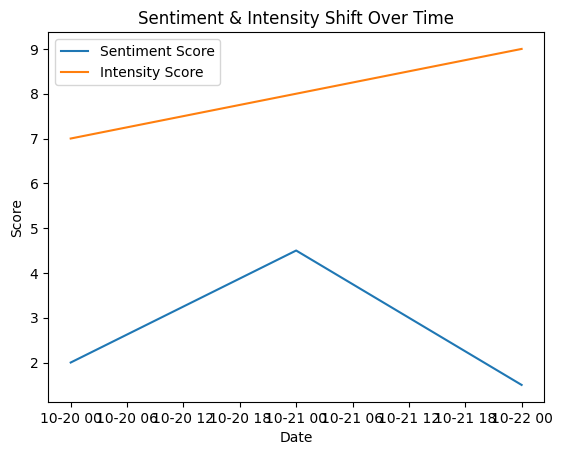

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated time-based data
data = {
    "date": ["2024-10-20", "2024-10-21", "2024-10-22"],
    "sentiment_score": [2.0, 4.5, 1.5],  # Arbitrary scale: Higher is more positive
    "intensity_score": [7, 8, 9]
}
df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"])

# Plot sentiment and intensity over time
plt.plot(df["date"], df["sentiment_score"], label="Sentiment Score")
plt.plot(df["date"], df["intensity_score"], label="Intensity Score")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Score")
plt.title("Sentiment & Intensity Shift Over Time")
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample Data (You should load your actual dataset)
data = {
    "User Input": [
        "I’m trying, but I’m still constantly worried.",
        "I can't sleep well at night.",
        "I feel overwhelmed with everything."
    ],
    "Polarity": ["Negative", "Negative", "Negative"],
    "Extracted Concern": ["constantly worried", "can't sleep", "overwhelmed"],
    "Category": ["Eating Disorder", "Insomnia", "Anxiety"],
    "Intensity": [3, 4, 5]
}

# Create DataFrame
df = pd.read_csv("mental_health_dataset.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
df['Polarity'] = label_encoder.fit_transform(df['Polarity'])
df['Category'] = label_encoder.fit_transform(df['Category'])

# Features and Target variable
X = df[['Polarity', 'Category']]
y = df['Intensity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Example to predict intensity score for a new input
new_input = pd.DataFrame({
    'Polarity': [label_encoder.transform(['Negative'])[0]],
    'Category': [label_encoder.transform(['Anxiety'])[0]]
})

predicted_intensity = model.predict(new_input)
print(f"Predicted Intensity Score: {predicted_intensity[0]:.2f}")


Mean Squared Error: 8.15


ValueError: y contains previously unseen labels: 'Negative'